# TER Project : Representing patient history with LLMs

*Authors* : Amine ELHANA, Sarah LAKHZOUM, Abdelbadie Dhiaeddine NESSAS

This notebook contains the exploratory phase of this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
patient_df = pd.read_csv("../data/df_char.csv")
patient_df

,Unnamed: 0,ID_PATIENT,AGE_DIAG,Nodal_Status,Mastectomy,Partial_Mastectomy,Surgery,CT,CT_Setting,CT_Regimen,...,RT_Setting,TT,TT_Setting,ET,ET_Setting,ET_Treatment,ET_Regimen,Age_range,Pathway,BC_SubType
0,0,10127015029441953,94,0,1,0,1,0,No,No,...,No,0,No,0,No,No ET,No ET,>=70,1,Unknown
1,1,10128002810515666,93,0,0,1,1,0,No,No,...,Adjuvant,0,No,1,Adjuvant,Tamoxifen,Unitherapy,>=70,4,Luminal
2,2,10128024250701935,93,1,0,1,1,0,No,No,...,Adjuvant,0,No,1,Adjuvant,AI,Unitherapy,>=70,4,Luminal
3,3,10128033549936740,93,0,0,1,1,0,No,No,...,Adjuvant,0,No,1,Adjuvant,Tamoxifen,Unitherapy,>=70,4,Luminal
4,4,10128064000854625,93,0,1,0,1,0,No,No,...,Adjuvant,0,No,1,Adjuvant,Tamoxifen,Unitherapy,>=70,4,Luminal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,11293018005167785,28,0,1,0,1,1,Neoadjuvant,Bitherapy,...,Adjuvant,0,No,1,Adjuvant,Tamoxifen followed by AI,Bitherapy,<50,5,Luminal
149996,149996,11293022113785146,28,1,0,1,1,0,No,No,...,Adjuvant,0,No,1,Adjuvant,AI,Unitherapy,<50,4,Luminal
149997,149997,11294021242399597,27,0,0,1,1,1,Adjuvant,Bitherapy,...,Adjuvant,0,No,0,No,No ET,No ET,<50,9,TNBC
149998,149998,11294080294882827,27,1,1,0,1,1,Adjuvant,Bitherapy,...,Adjuvant,0,No,1,Adjuvant,AI,Unitherapy,<50,10,Luminal


- CT : chemotherapy
- RT : radiotherapy
- TT : Testosterone therapy
- ET : endocrine therapy
- BC_SubType : breast cancer sub type

In [3]:
patient_df.nunique()

Unnamed: 0            150000
ID_PATIENT            150000
AGE_DIAG                  76
Nodal_Status               2
Mastectomy                 2
Partial_Mastectomy         2
Surgery                    1
CT                         2
CT_Setting                 3
CT_Regimen                 3
RT                         2
RT_Setting                 2
TT                         2
TT_Setting                 3
ET                         2
ET_Setting                 2
ET_Treatment               7
ET_Regimen                 3
Age_range                  4
Pathway                   10
BC_SubType                 4
dtype: int64

In [4]:
patient_df_dropped = patient_df.drop(['Unnamed: 0', 'ID_PATIENT', 'AGE_DIAG', 'Surgery'], axis=1)
cols = patient_df_dropped.columns
for col in cols:
    print(f'Column : {col}')
    print(patient_df_dropped[col].value_counts())
    print("\n")

Column : Nodal_Status
Nodal_Status
0    122299
1     27701
Name: count, dtype: int64


Column : Mastectomy
Mastectomy
1    89807
0    60193
Name: count, dtype: int64


Column : Partial_Mastectomy
Partial_Mastectomy
0    89807
1    60193
Name: count, dtype: int64


Column : CT
CT
0    91566
1    58434
Name: count, dtype: int64


Column : CT_Setting
CT_Setting
No             91566
Adjuvant       48118
Neoadjuvant    10316
Name: count, dtype: int64


Column : CT_Regimen
CT_Regimen
No            91566
Unitherapy    33912
Bitherapy     24522
Name: count, dtype: int64


Column : RT
RT
1    131948
0     18052
Name: count, dtype: int64


Column : RT_Setting
RT_Setting
Adjuvant    131948
No           18052
Name: count, dtype: int64


Column : TT
TT
0    138061
1     11939
Name: count, dtype: int64


Column : TT_Setting
TT_Setting
No             138061
Adjuvant         9009
Neoadjuvant      2930
Name: count, dtype: int64


Column : ET
ET
1    107220
0     42780
Name: count, dtype: int64


Column

Text(0, 0.5, 'Frequency')

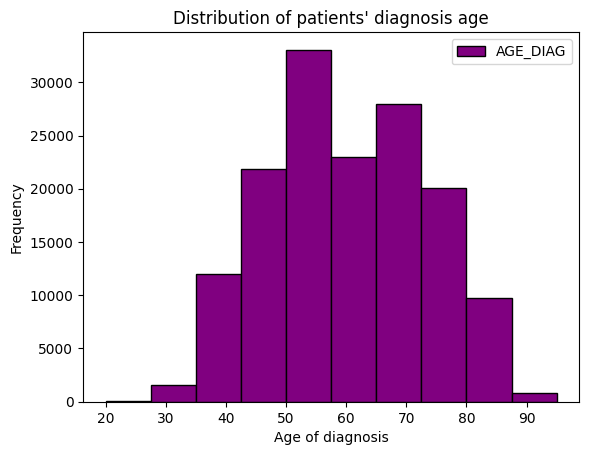

In [5]:
ax = patient_df.plot.hist(column=['AGE_DIAG'], color='purple', edgecolor='black')
ax.set_title('Distribution of patients\' diagnosis age') 
ax.set_xlabel('Age of diagnosis')
ax.set_ylabel('Frequency')

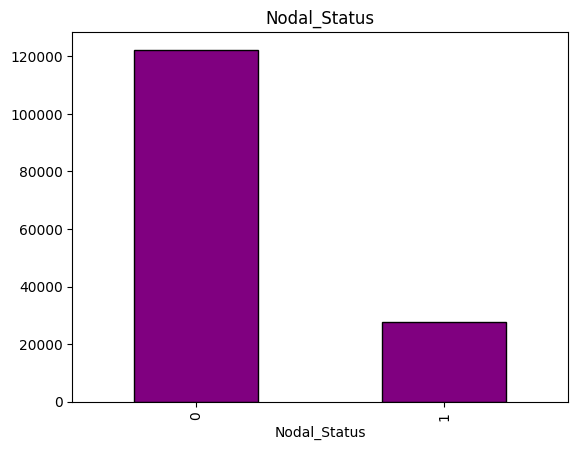

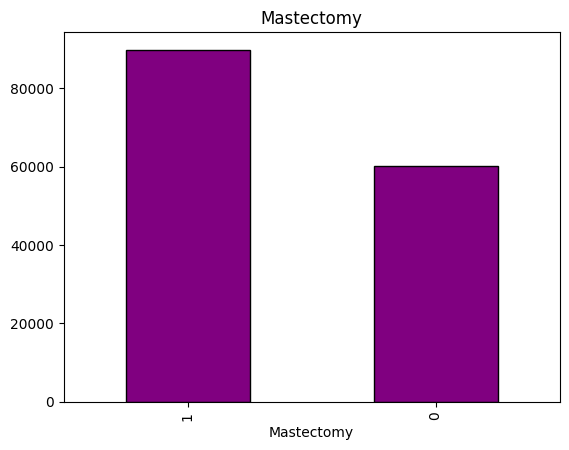

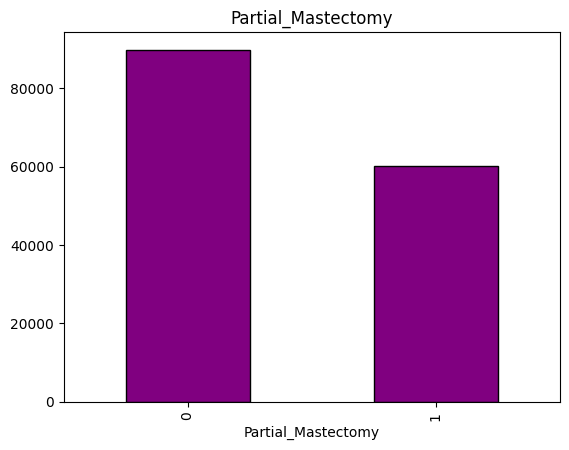

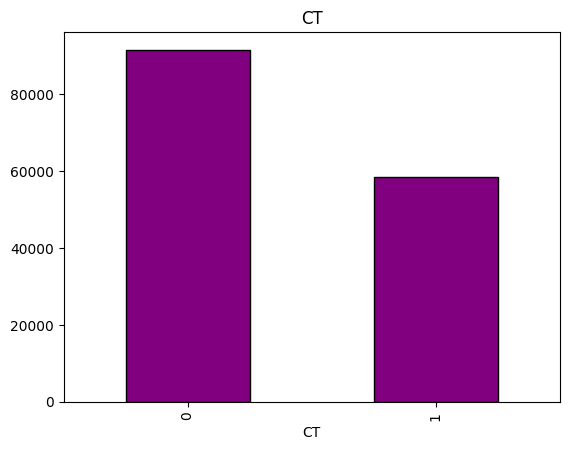

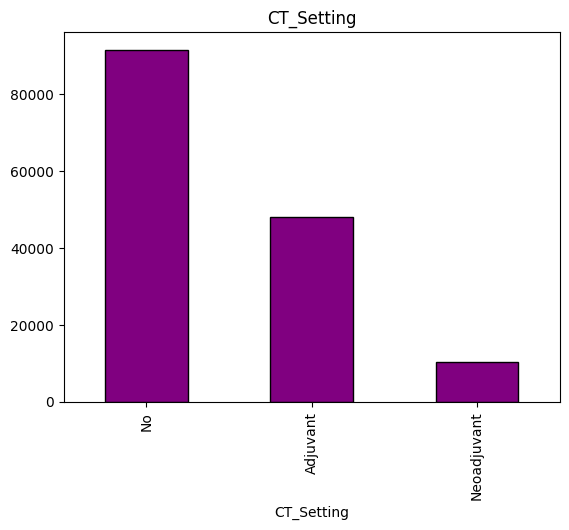

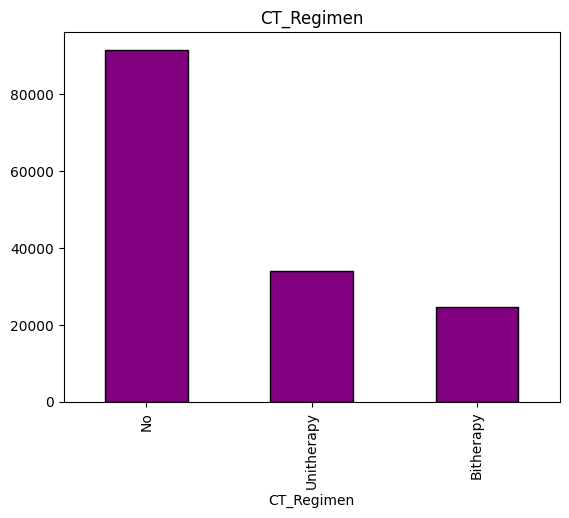

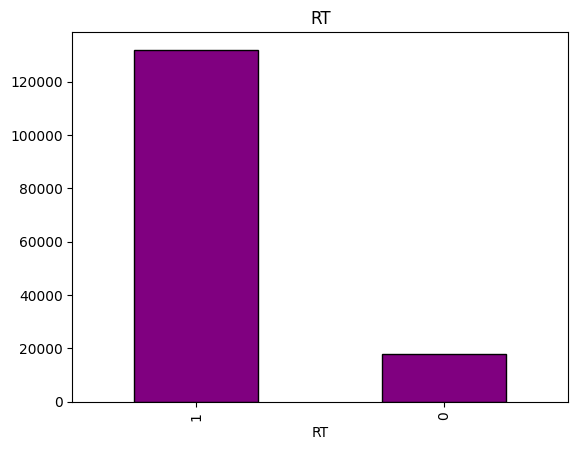

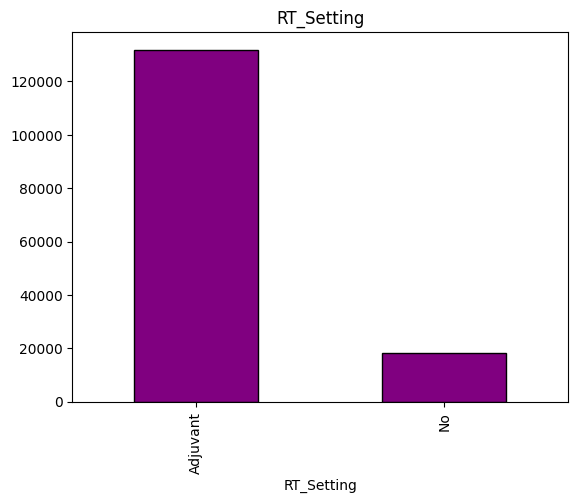

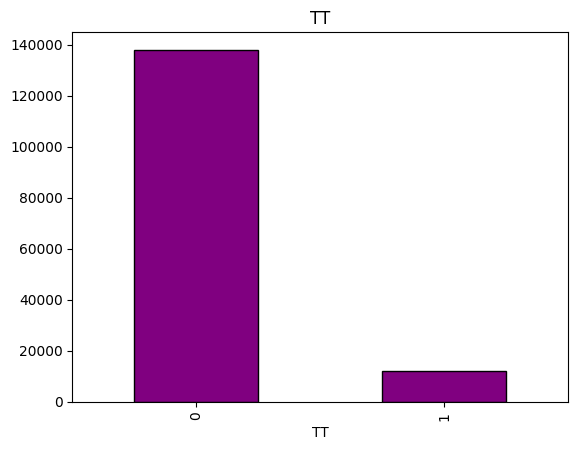

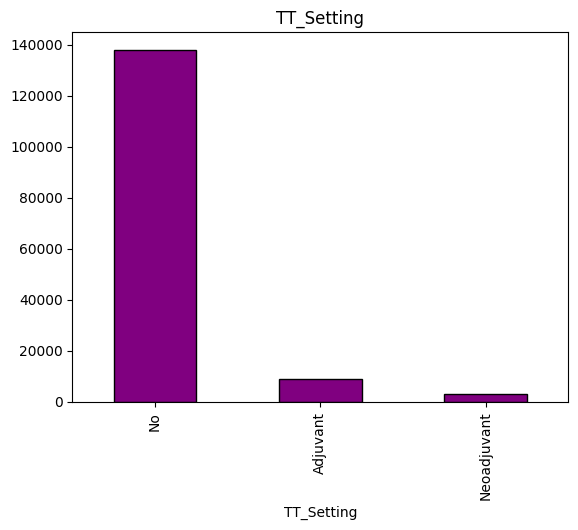

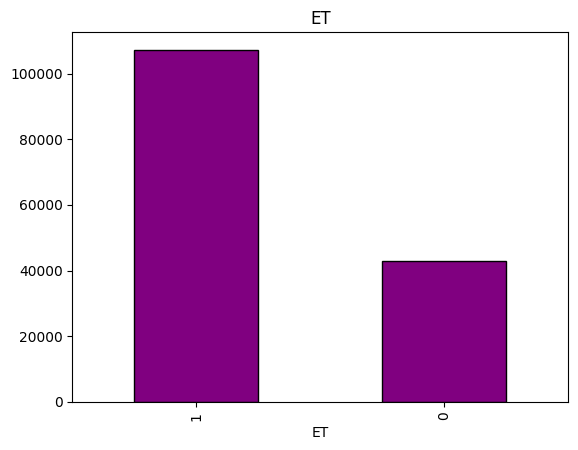

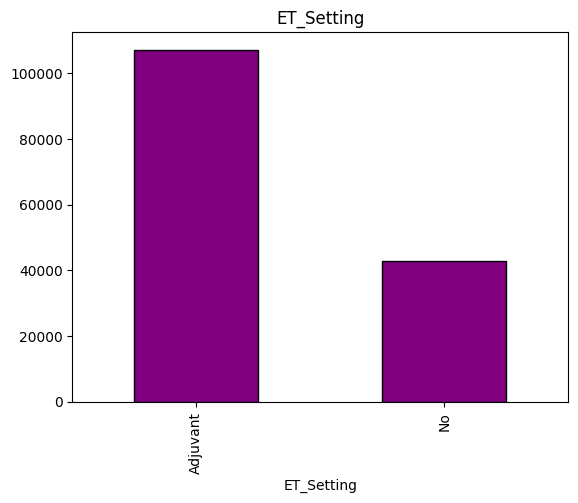

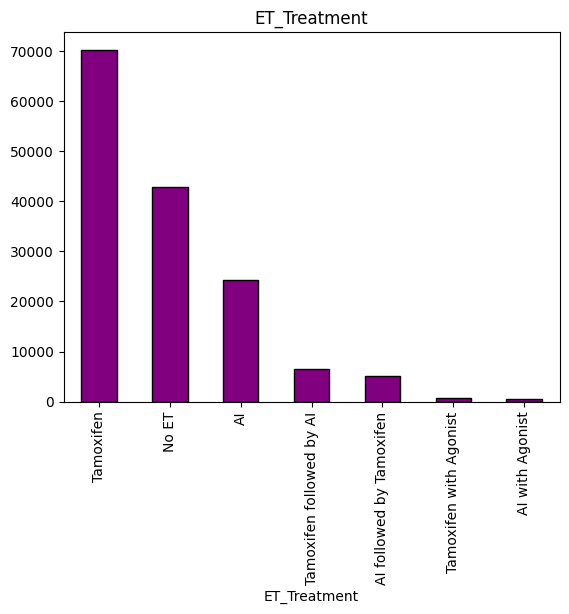

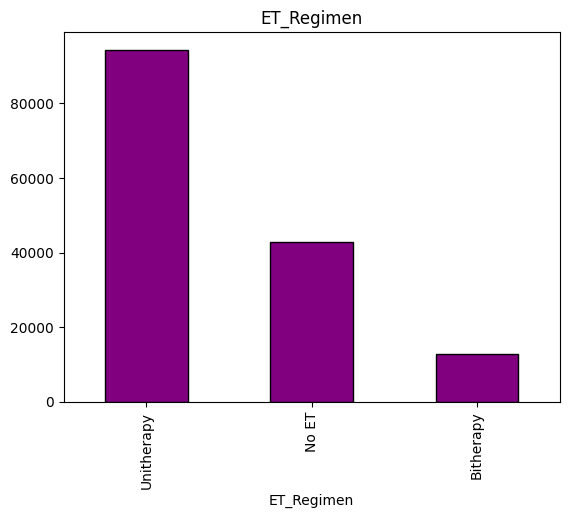

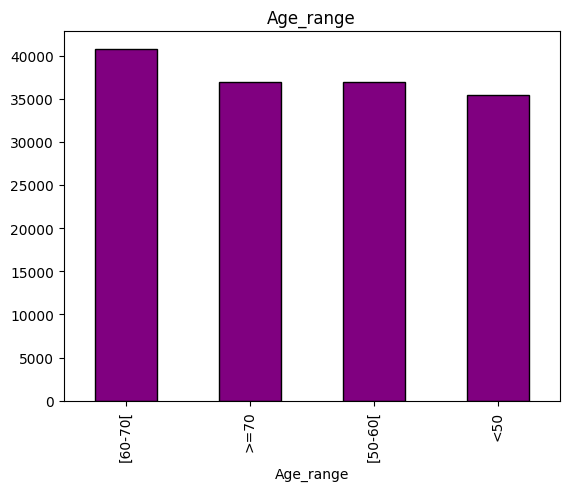

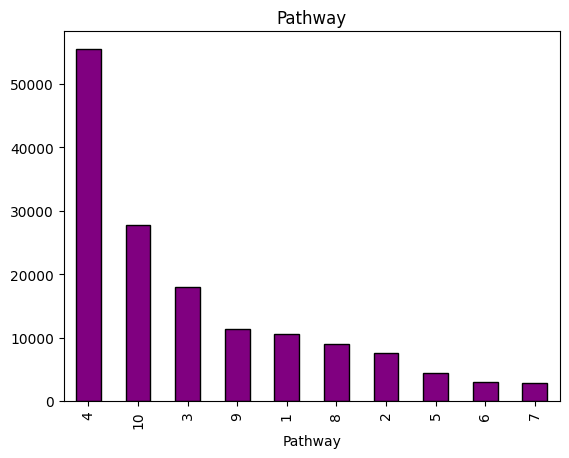

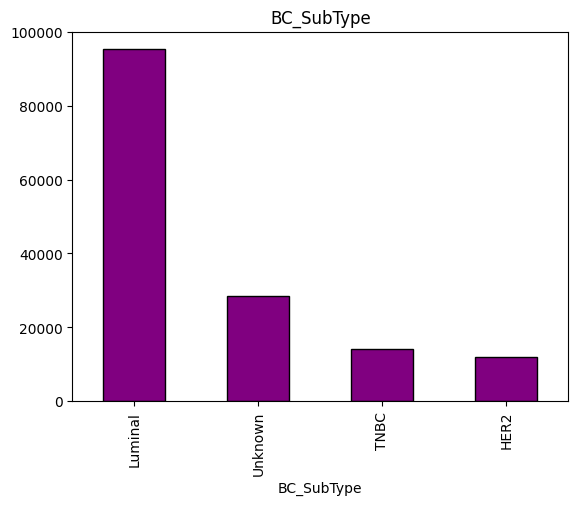

In [6]:
for col in cols:
    patient_df_dropped[col].value_counts().plot(kind="bar", color='purple', edgecolor='black').set_title(col)
    plt.show()

In [7]:
pathway = patient_df.groupby('Pathway')
pathway.first()

,Unnamed: 0,ID_PATIENT,AGE_DIAG,Nodal_Status,Mastectomy,Partial_Mastectomy,Surgery,CT,CT_Setting,CT_Regimen,RT,RT_Setting,TT,TT_Setting,ET,ET_Setting,ET_Treatment,ET_Regimen,Age_range,BC_SubType
Pathway,,,,,,,,,,,,,,,,,,,,
1,0,10127015029441953,94,0,1,0,1,0,No,No,0,No,0,No,0,No,No ET,No ET,>=70,Unknown
2,38,10132024124161858,89,0,1,0,1,0,No,No,0,No,0,No,1,Adjuvant,Tamoxifen,Unitherapy,>=70,Luminal
3,5,10128067936413950,93,0,0,1,1,0,No,No,1,Adjuvant,0,No,0,No,No ET,No ET,>=70,Unknown
4,1,10128002810515666,93,0,0,1,1,0,No,No,1,Adjuvant,0,No,1,Adjuvant,Tamoxifen,Unitherapy,>=70,Luminal
5,3105,10152035126875162,69,0,1,0,1,1,Neoadjuvant,Unitherapy,1,Adjuvant,0,No,1,Adjuvant,Tamoxifen followed by AI,Bitherapy,[60-70[,Luminal
6,161,10135069282728923,86,1,1,0,1,1,Neoadjuvant,Unitherapy,1,Adjuvant,0,No,0,No,No ET,No ET,>=70,TNBC
7,28,10131067074544578,90,0,0,1,1,1,Neoadjuvant,Unitherapy,1,Adjuvant,1,Neoadjuvant,1,Adjuvant,Tamoxifen followed by AI,Bitherapy,>=70,HER2
8,8,10129001187595067,92,0,1,0,1,1,Adjuvant,Unitherapy,1,Adjuvant,1,Adjuvant,1,Adjuvant,Tamoxifen,Unitherapy,>=70,HER2
9,13,10129062256203281,92,0,1,0,1,1,Adjuvant,Unitherapy,1,Adjuvant,0,No,0,No,No ET,No ET,>=70,TNBC


In [8]:
patient_df['Pathway'].value_counts().sort_index()

Pathway
1     10521
2      7531
3     17996
4     55518
5      4426
6      2960
7      2930
8      9009
9     11303
10    27806
Name: count, dtype: int64

In [9]:
patient_df['BC_SubType'].value_counts()

BC_SubType
Luminal    95281
Unknown    28517
TNBC       14263
HER2       11939
Name: count, dtype: int64

In [10]:
visits = pd.read_pickle("../data/Bdd.pkl")
visits

,BEN_IDT_ANO,DATE,COD_CCAM,COD_ICD10,COD_CIP,COD_UCD
0,10127015029441953,2022-01-08,QEFA019,None,None,None
1,10127015029441953,2022-01-08,None,C50,None,None
2,10128002810515666,2022-01-09,QEFA018,None,None,None
3,10128002810515666,2022-01-09,None,C50,None,None
4,10128002810515666,2022-02-01,None,Z5100,None,None
...,...,...,...,...,...,...
8779884,11295046241182206,2023-08-28,None,None,3400935940469,None
8779885,11295046241182206,2023-09-28,None,None,3400935940469,None
8779886,11295046241182206,2023-10-28,None,None,3400935940469,None
8779887,11295046241182206,2023-11-28,None,None,3400935940469,None


In [11]:
visits_cols = visits.columns

In [12]:
# tranforming date column into a date type

visits["DATE"] = pd.to_datetime(visits['DATE'], errors='coerce')

In [13]:
print("Number of non-missing values for each column :")
for col in visits_cols:
    print(f"{col} : {visits[col].count()}")

Number of non-missing values for each column :
BEN_IDT_ANO : 8779889
DATE : 8779889
COD_CCAM : 4125831
COD_ICD10 : 2612054
COD_CIP : 1329008
COD_UCD : 527715


In [14]:
code_columns = ['COD_CCAM', 'COD_CIP', 'COD_UCD']
for col in code_columns:
    print(visits[col].value_counts(sort=True))

COD_CCAM
ZZNL065    614414
YYYY047    422800
ZZLF900    388561
YYYY166    352720
YYYY152    279701
            ...  
YYYY492      3567
ZZNL042      3206
EDLF016      2392
YYYY136      2015
HPLB003      1878
Name: count, Length: 81, dtype: int64
COD_CIP
3400936797598    24609
3400934303791    24576
3400933263867    24497
3400936136601    24169
3400933288303    24148
                 ...  
3400936690929      468
3400937575256      432
3400933943769      396
3400932850037      384
3400934125652      384
Name: count, Length: 189, dtype: int64
COD_UCD
9031083    39972
9031077    39885
9031114    39586
9220097    24304
9400037    23452
           ...  
9284393     1627
9343747     1619
9313172     1602
9306686     1565
9284335     1542
Name: count, Length: 153, dtype: int64


In [15]:
most_common_tokens = {}

for col in code_columns:
    value_counts = visits[col].value_counts(sort=True)

    cumsum = value_counts.cumsum()
    total_count = value_counts.sum()
    cumulative_percentage = (cumsum / total_count) * 100
    
    top_70_mask = cumulative_percentage <= 70
    top_70_codes = value_counts[top_70_mask]
    
    print(f"\nNumber of codes in {col} in top 70%: {len(top_70_codes)}")
    print(f"These cover {top_70_codes.sum() / total_count * 100:.1f}% of all occurrences")
    
    top_70_list = [code for code in top_70_codes.index if pd.notna(code)]
    most_common_tokens[col] = top_70_list
    
    print(f"First 5 codes: {top_70_list[:5]}")


Number of codes in COD_CCAM in top 70%: 10
These cover 68.7% of all occurrences
First 5 codes: ['ZZNL065', 'YYYY047', 'ZZLF900', 'YYYY166', 'YYYY152']

Number of codes in COD_CIP in top 70%: 40
These cover 69.7% of all occurrences
First 5 codes: [3400936797598, 3400934303791, 3400933263867, 3400936136601, 3400933288303]

Number of codes in COD_UCD in top 70%: 71
These cover 69.8% of all occurrences
First 5 codes: ['9031083', '9031077', '9031114', '9220097', '9400037']


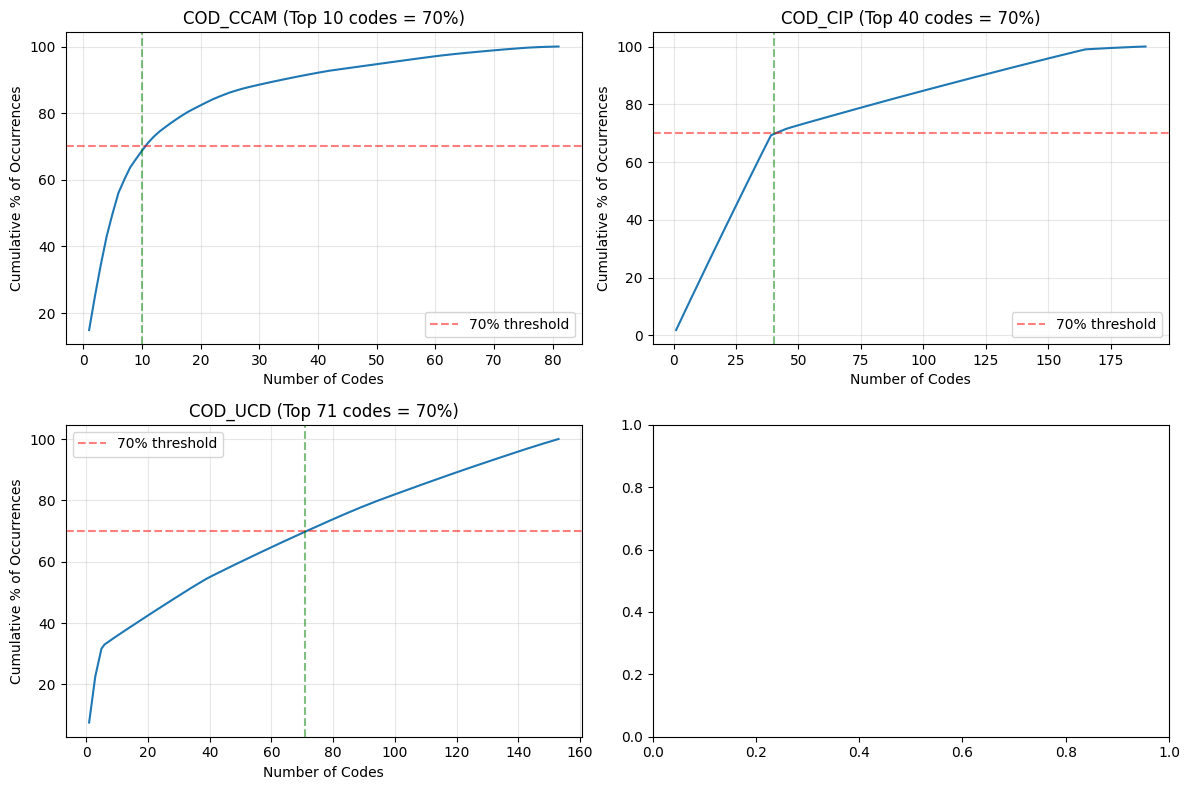

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, col in enumerate(code_columns):
    value_counts = visits[col].value_counts(dropna=True, sort=True)
    cumsum = value_counts.cumsum()
    total_count = value_counts.sum()
    cumulative_percentage = (cumsum / total_count) * 100
    
    axes[idx].plot(range(1, len(cumulative_percentage) + 1), cumulative_percentage.values)
    axes[idx].axhline(y=70, color='r', linestyle='--', alpha=0.5, label='70% threshold')
    
    crossing_point = (cumulative_percentage <= 70).sum()
    axes[idx].axvline(x=crossing_point, color='g', linestyle='--', alpha=0.5)
    
    axes[idx].set_title(f'{col} (Top {crossing_point} codes = 70%)')
    axes[idx].set_xlabel('Number of Codes')
    axes[idx].set_ylabel('Cumulative % of Occurrences')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [17]:
visits_per_patient = visits.groupby('BEN_IDT_ANO')

In [18]:
grouped_sorted = visits.sort_values(['BEN_IDT_ANO', 'DATE']).groupby('BEN_IDT_ANO')

first_patient_id = list(grouped_sorted.groups.keys())[0]
sorted_visits = grouped_sorted.get_group(first_patient_id)

print(f"Patient {first_patient_id} visits sorted by date:\n")
print(sorted_visits[['DATE', 'COD_CCAM', 'COD_CIP', 'COD_UCD', 'COD_ICD10']].head())

Patient 10127015029441953 visits sorted by date:

        DATE COD_CCAM COD_CIP COD_UCD COD_ICD10
0 2022-01-08  QEFA019    None    None      None
1 2022-01-08     None    None    None       C50


In [19]:
# Create sequences of codes for each patient
patient_sequences = {}

for patient_id, group_df in visits_per_patient:
    if 'DATE' in group_df.columns:
        group_df = group_df.sort_values('DATE')
    
    # Create sequences for each code type
    patient_sequences[patient_id] = {
        'ccam_sequence': group_df['COD_CCAM'].dropna().tolist(),
        'icd10_sequence': group_df['COD_ICD10'].dropna().tolist(),
        'cip_sequence': group_df['COD_CIP'].dropna().tolist(),
        'ucd_sequence': group_df['COD_UCD'].dropna().tolist(),
        'num_visits': len(group_df),
        'date_range': (group_df['DATE'].min(), group_df['DATE'].max()) if 'DATE' in group_df.columns else None
    }

sequences_df = pd.DataFrame.from_dict(patient_sequences, orient='index')
print("Patient sequences DataFrame:")
sequences_df

Patient sequences DataFrame:


,ccam_sequence,icd10_sequence,cip_sequence,ucd_sequence,num_visits,date_range
10127015029441953,[QEFA019],[C50],[],[],2,"(2022-01-08 00:00:00, 2022-01-08 00:00:00)"
10128002810515666,"[QEFA018, YYYY166, YYYY166, YYYY166, YYYY166, ...","[C50, Z5100, Z5101, Z5101, Z5101, Z5101, Z5101...","[3400934317811, 3400934317811, 3400934317811, ...",[],63,"(2022-01-09 00:00:00, 2023-02-17 00:00:00)"
10128024250701935,"[QEFA001, YYYY048, YYYY048, YYYY048, YYYY048, ...",[C50],"[3400949410477, 3400949410477, 3400949410477, ...",[],39,"(2022-01-03 00:00:00, 2023-03-13 00:00:00)"
10128033549936740,"[QEFA018, ZZNL065, ZZNL065, ZZNL065, ZZNL065, ...","[C50, Z5100, Z5101, Z5101, Z5101, Z5101, Z5101...","[3400932059324, 3400932059324, 3400932059324, ...",[],83,"(2022-01-22 00:00:00, 2023-03-27 00:00:00)"
10128064000854625,"[QEFA015, YYYY048, YYYY048, YYYY048, YYYY048, ...",[C50],"[3400936797659, 3400936797659, 3400936797659, ...",[],38,"(2022-01-13 00:00:00, 2023-04-24 00:00:00)"
...,...,...,...,...,...,...
11293018005167785,"[ZZLF900, ZZLF900, ZZLF900, ZZLF900, ZZLF900, ...","[Z511, Z511, Z511, Z511, Z511, Z511, Z511, Z51...","[3400933288303, 3400933288303, 3400933288303, ...","[9306663, 9306663, 9306663, 9306663, 9340950, ...",97,"(2022-08-16 00:00:00, 2023-06-14 00:00:00)"
11293022113785146,"[QEFA008, ZZNL065, ZZNL065, ZZNL065, ZZNL065, ...","[C50, Z5100, Z5101, Z5101, Z5101, Z5101, Z5101...","[3400930108345, 3400930108345, 3400930108345, ...",[],84,"(2022-05-17 00:00:00, 2023-06-25 00:00:00)"
11294021242399597,"[QEFA017, ZZLF900, ZZLF900, ZZLF900, ZZLF900, ...","[C50, Z511, Z511, Z511, Z511, Z511, Z511, Z511]",[],"[9192136, 9192136, 9192136, 9192136, 9327926, ...",47,"(2022-11-12 00:00:00, 2023-07-24 00:00:00)"
11294080294882827,"[QEFA007, ZZLF900, ZZLF900, ZZLF900, ZZLF900, ...","[C50, Z511, Z511, Z511, Z511, Z511, Z511, Z511...","[3400939986838, 3400939986838, 3400939986838, ...","[9285346, 9285346, 9285346, 9341004, 9341004, ...",112,"(2022-06-28 00:00:00, 2024-01-04 00:00:00)"


In [20]:
# Analyze time between visits (if DATE available)
time_between_visits = {}

for patient_id, group_df in visits_per_patient:
    if len(group_df) > 1 and 'DATE' in group_df.columns:
        group_df = group_df.sort_values('DATE')
        dates = pd.to_datetime(group_df['DATE'])
        time_diffs = (dates.diff().dt.days).dropna()
        time_between_visits[patient_id] = {
            'mean_days': time_diffs.mean(),
            'std_days': time_diffs.std(),
            'min_days': time_diffs.min(),
            'max_days': time_diffs.max()
        }

time_between_df = pd.DataFrame.from_dict(time_between_visits, orient='index')
print("Time between visits (patients with >1 visit):")
print(time_between_df.describe())

Time between visits (patients with >1 visit):
           mean_days       std_days  min_days       max_days
count  150000.000000  140272.000000  150000.0  150000.000000
mean        7.065389       9.429399       0.0      30.513660
std         5.865898       3.450829       0.0      13.147462
min         0.000000       0.000000       0.0       0.000000
25%         3.763158       7.975917       0.0      31.000000
50%         5.569444      10.641350       0.0      31.000000
75%        10.241379      12.022560       0.0      32.000000
max        28.230769      14.424700       0.0      62.000000
